## 'Programming for Data Analysis' project

## Contents

1. [Problem statement](#Problem-statement)<br>
   i. [Requirements](#Requirements)<br>
2. [Method](#Method)<br>
3. [Choose Dataset](#Choose-Dataset)<br>
4. [Import Libraries](#Import-Libraries)<br>
5. [Examine the dataset](#Examine-the-dataset)<br>
    a. [Read in the dataset](#Read-in-the-dataset)<br>
    b. [First five rows](#First-five-rows)<br>
    c. [Last five rows](#Last-five-rows)<br>
    d. [Data types of variables](#Data-types-of-variables)<br>
    e. [Basic statistics](#Basic-statistics)<br>
6. [Format dataset](#Format-dataset)<br>
7. [Visual summary of variables](#Visual-summary-of-variables)<br>
8. [Probability distributions of variables](#Probability-distributions-of-variables)<br>
    a. [Fixed acidity](#Fixed-acidity)<br>
    b. [Volatile acidity](#Volatile-acidity)<br>
    c. [Citric acid](#Citric-acid)<br>
    d. [Residual sugar](#Residual-sugar)<br>
    e. [Chlorides](#Chlorides)<br>
    f. [Free sulfur dioxide](#Free-sulfur-dioxide)<br>
    g. [Total sulfur dioxide](#Total-sulfur-dioxide)<br>
    h. [Density](#Density)<br>
    j. [pH](#pH)<br>
    k. [Sulphates](#)<br>
    l. [Alcohol](#)<br>
    m. [Quality](#Quality)<br>
19. [Conclusion](#Conclusion)
20. [References](#References)<br>

## Problem statement

Create a data set by simulating a real-world phenomenon of
your choosing.<br> You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life.<br> 
Then, rather than collect data
related to the phenomenon, you should model and synthesise such data using Python.

### Requirements

1. Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables. 

2. Investigate the types of variables involved, their likely distributions, and their relationships with each other.

3.  Synthesise/simulate a data set as closely matching their properties as possible.

4.  Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

## Method

For this project, a dataset is needed to synthesise the data from. Regardless of what the real-world phenomenon might be, there more than likely will be a dataset related to the phenomenon.
The following process will be used to work through the project.

1. Choose dataset
2. Import all necessary Python libraries
3. Examine dataset
4. Format dataset as needed
5. Visual summary of variables
6. Determine probability distribution of each variable in the dataset
7. Generate synthetic data from each variable
8. Check synthetic data has the same probability distribution as original data

## Choose Dataset

For this project, the dataset of portuguese red wine will be used - for the simple fact that I like red wine and want to know what makes a good wine.

The dataset will be in a csv (comma-seperated value) format.

## Import Libraries

Import all the libraries needed for the project.

As the data is in tabular format we need:
- Pandas and Numpy for working with tabular data and numerical arrays
- Matplotlib and seaborn for visualising the data
- Distfit or Fitter to determine the probability distribution of variables
- Scipy to generate the synthetic data

In [134]:
import pandas as pd
import numpy as np
from numpy import random
# Import matplotlib and seaborn to visualise data
import matplotlib.pyplot as plt
import seaborn as sns
# distfit is used to find the type of distribution
from distfit import distfit
# Fitter is another library to find the distribution
from fitter import Fitter, get_common_distributions, get_distributions
# scipy to generate synthetic data
from scipy.stats import lognorm

## Examine the dataset

The dataset is read in, and the data summary observed.
Then the top 10/last 10 rows can be seen, as information about all the data types of each variables, i.e. are they strings, integers, floating-point numbers, etc.

From there, basic statistics can be generated and the dataset can be cleaned up by removing any duplicate or unnecessary columns.

### Read in the dataset

Read in the dataset and see the first five/last five rows.

In [136]:
# Read in the csv file - note that the csv is in the same folder as this notebook
df = pd.read_csv('WineQT.csv')
df

# To-do:
# Run command to check for missing data
# Re-format text above to put in bullet points so that it's easier to read.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


### First five rows

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### Last five rows

In [8]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


### Data types of variables

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


### Basic statistics

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


## Format dataset

Drop the Id column as it's not necessary to reference the rows and/or columns.

In [11]:
df = df.drop(columns=['Id'])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


## Visual summary of variables

Below, all 12 variables will be plotted. Note how *quality* has been left in, but whilst all the other variables are some type of chemical compound, *quality* is arbitrary and has been determined:
- either manually
- through a relationship or pattern between one or more variables.

In [62]:
wine_variables = df.columns.values.tolist()
wine_variables

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

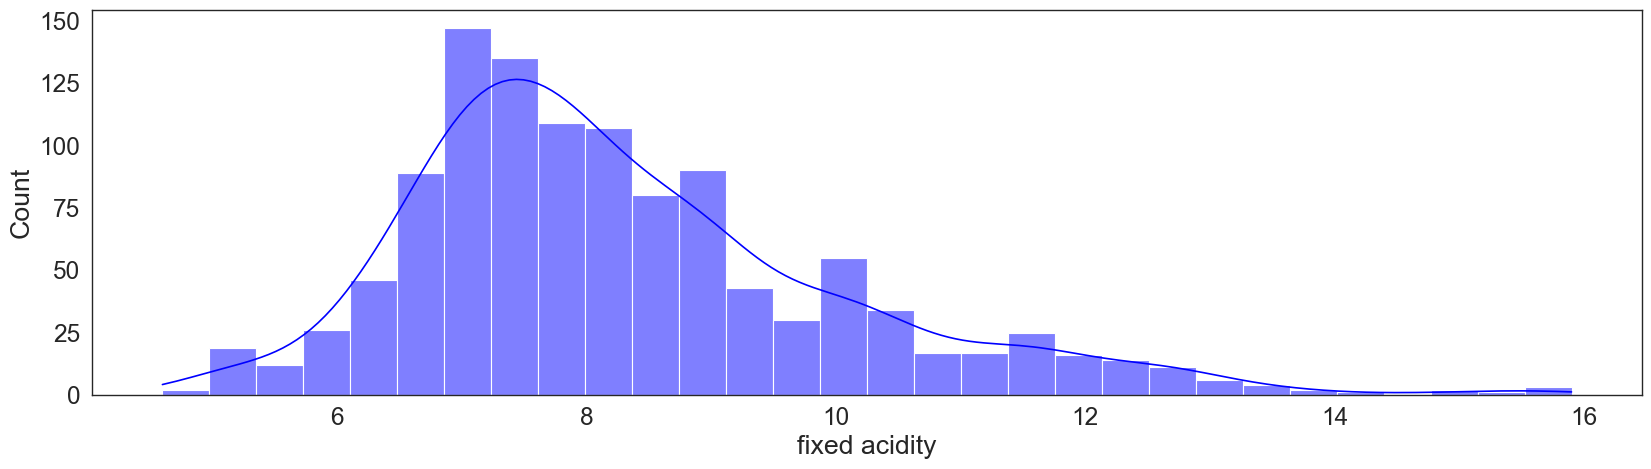

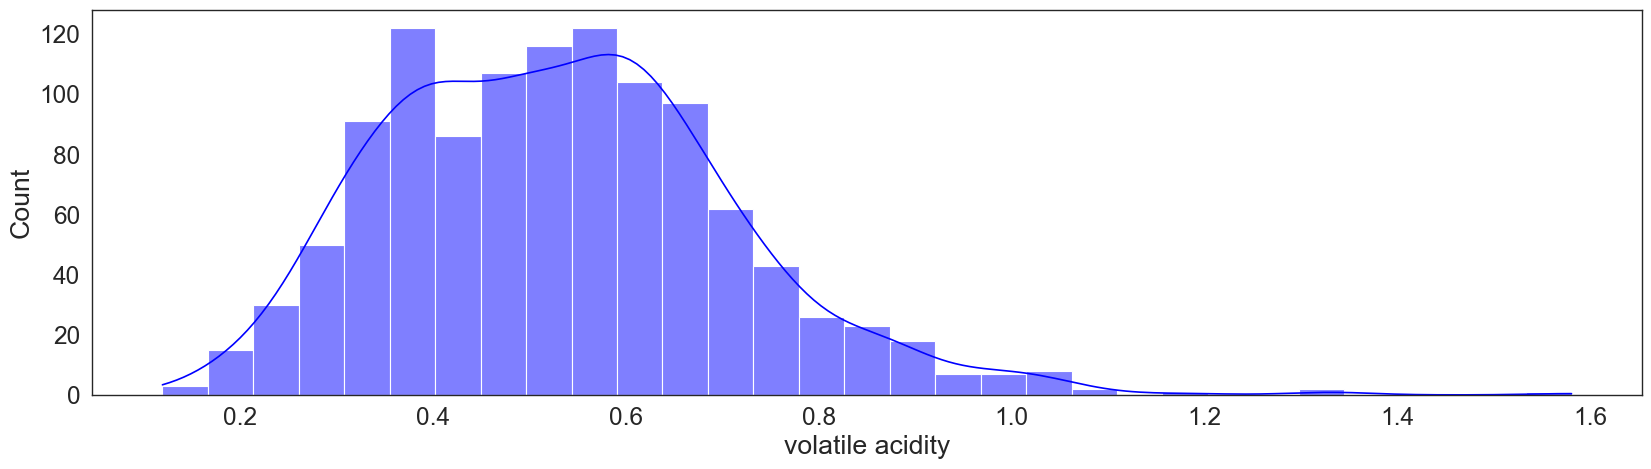

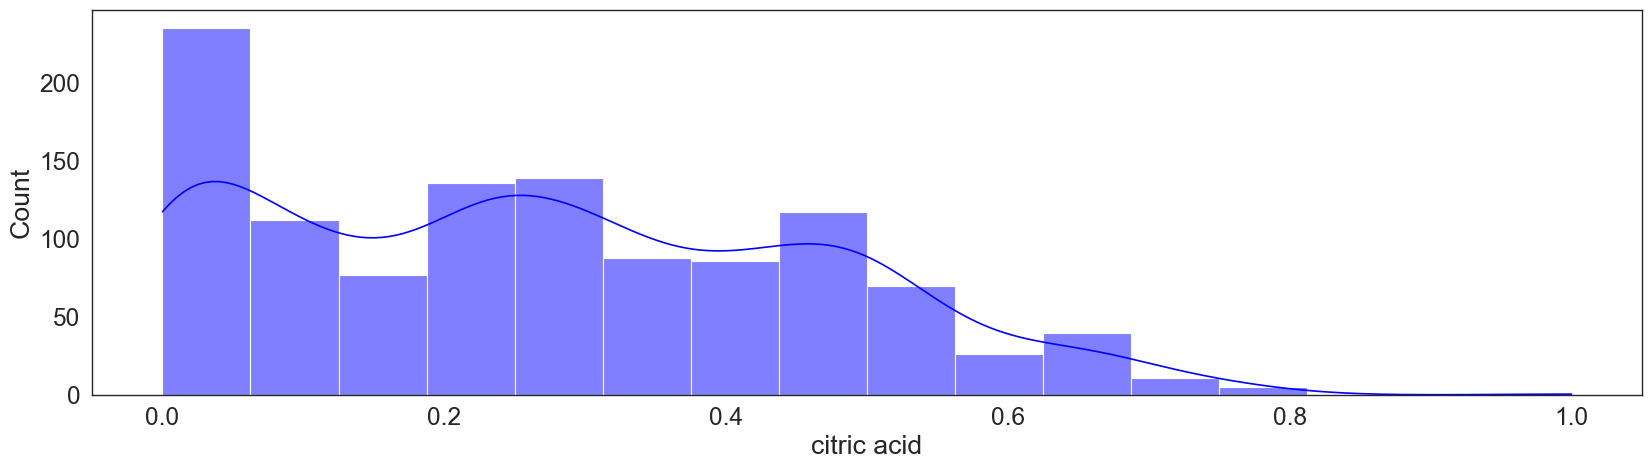

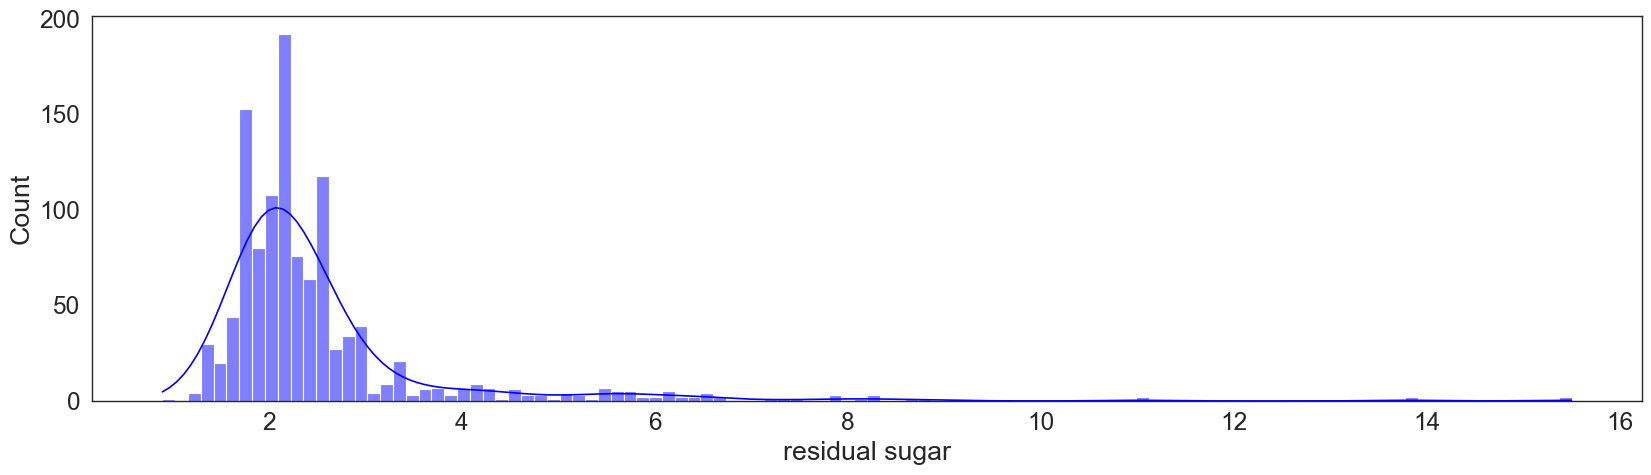

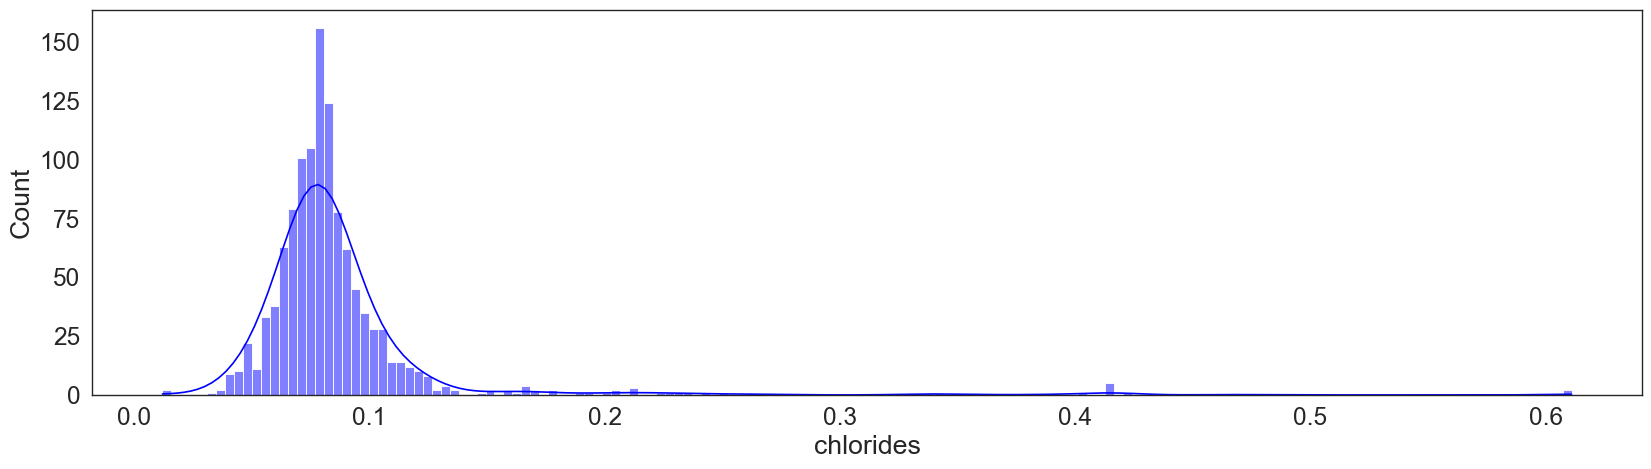

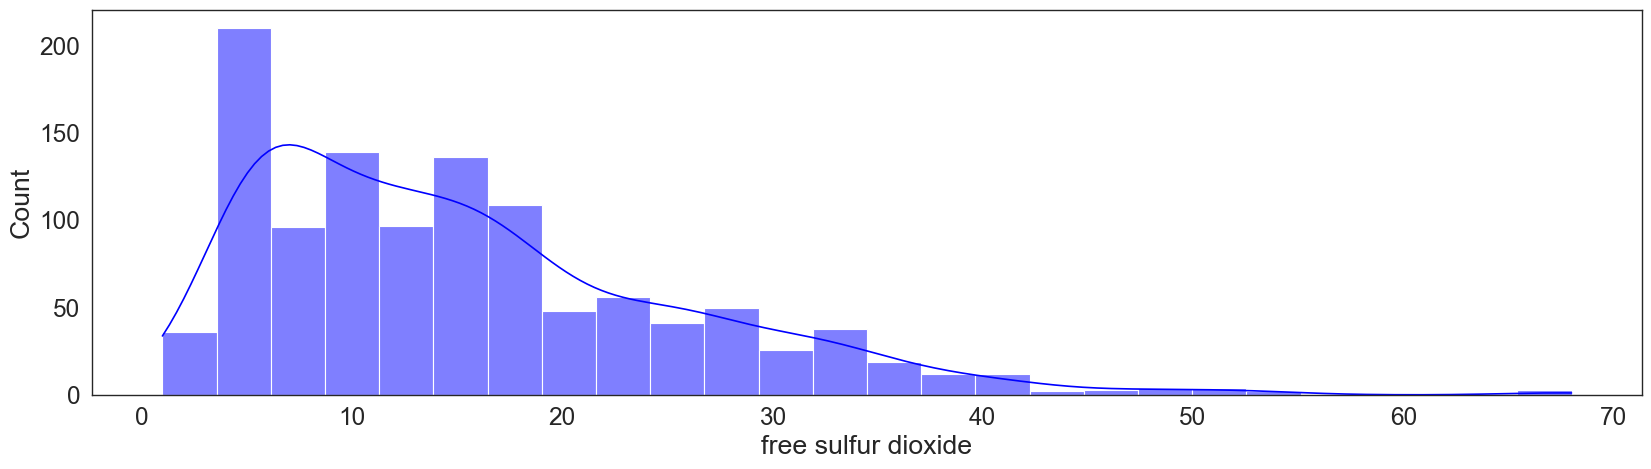

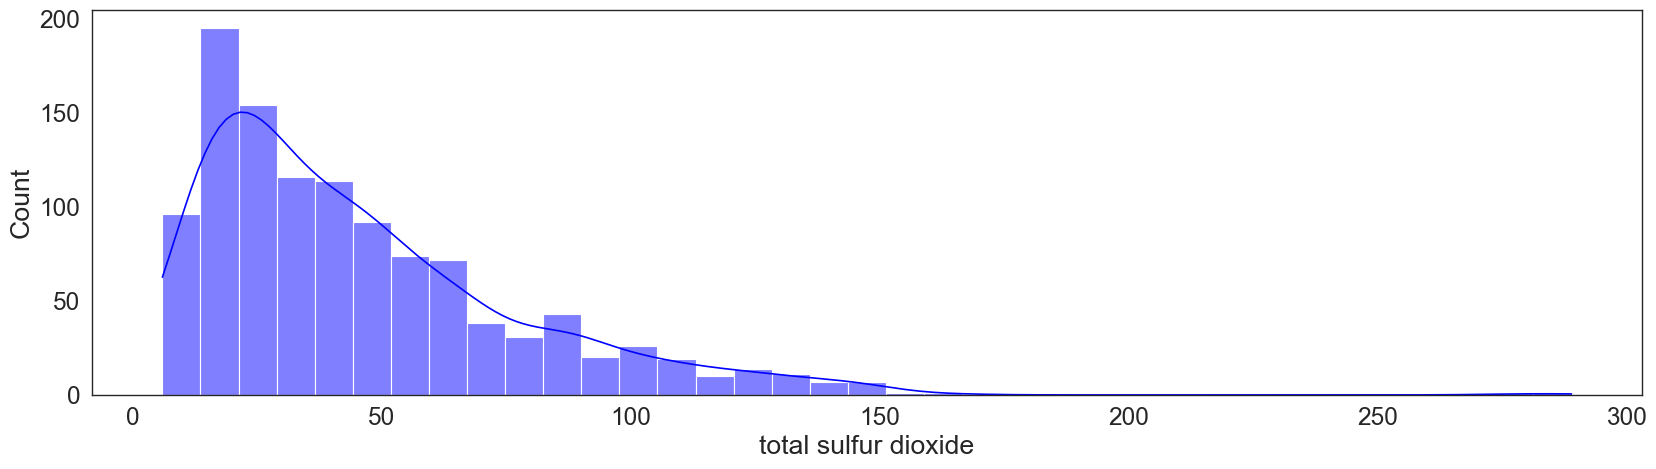

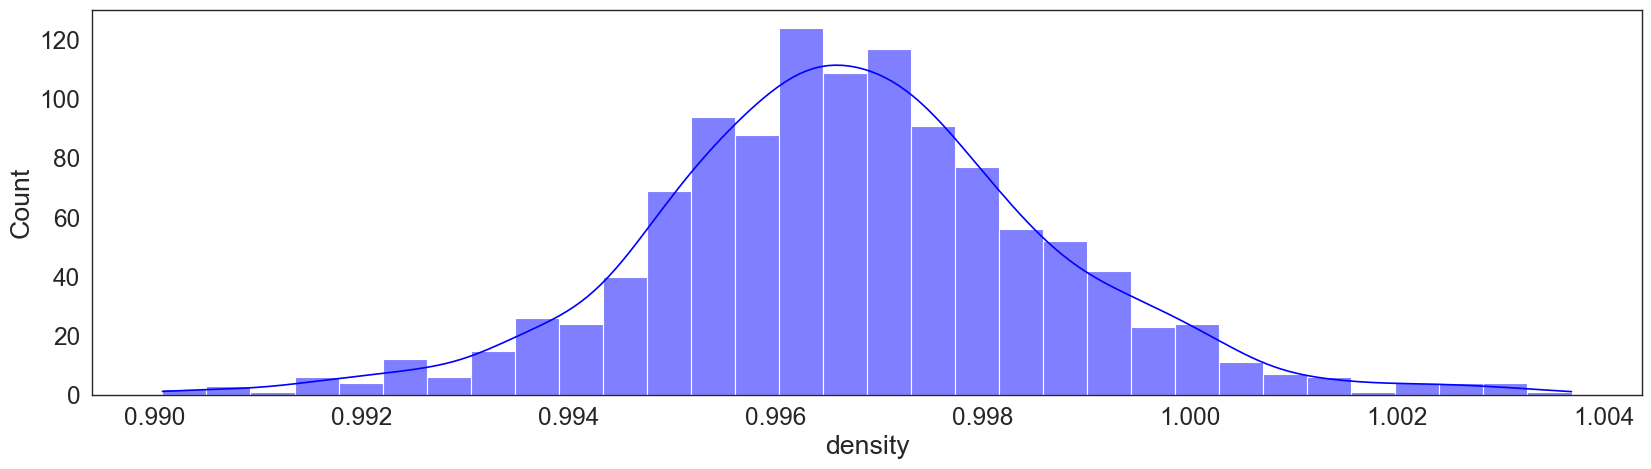

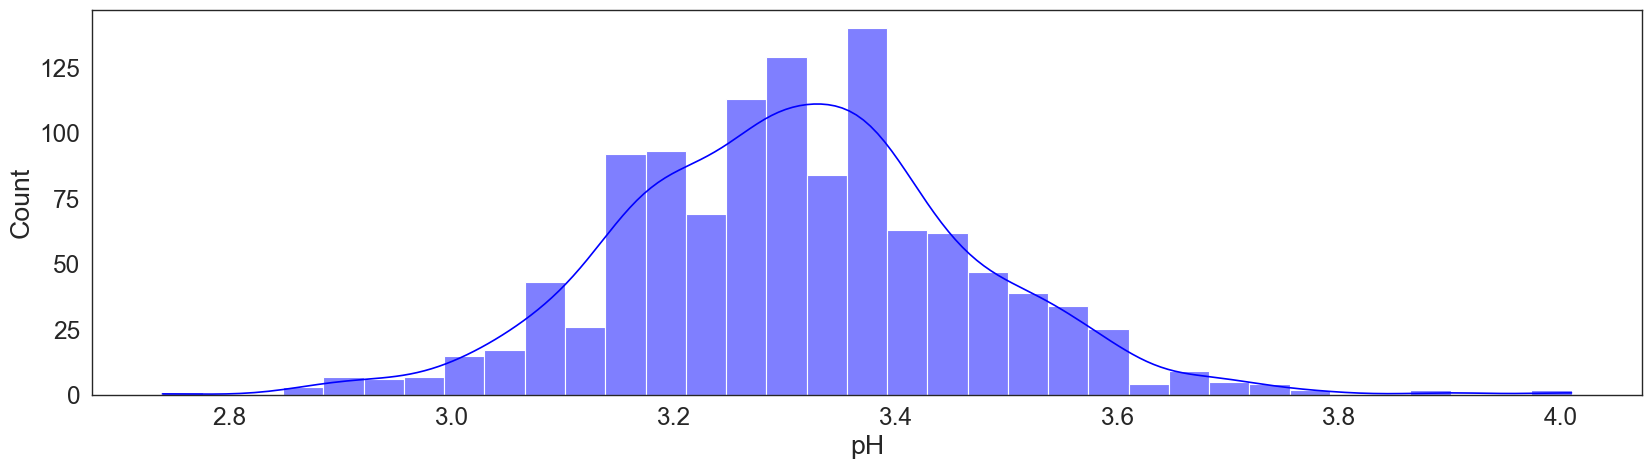

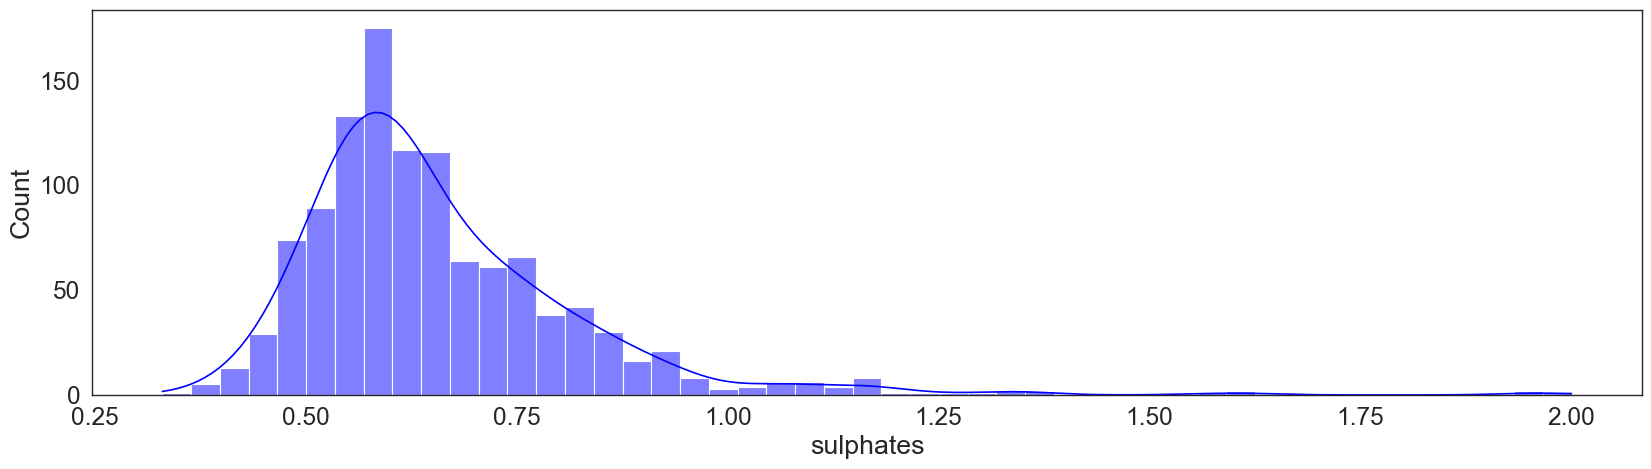

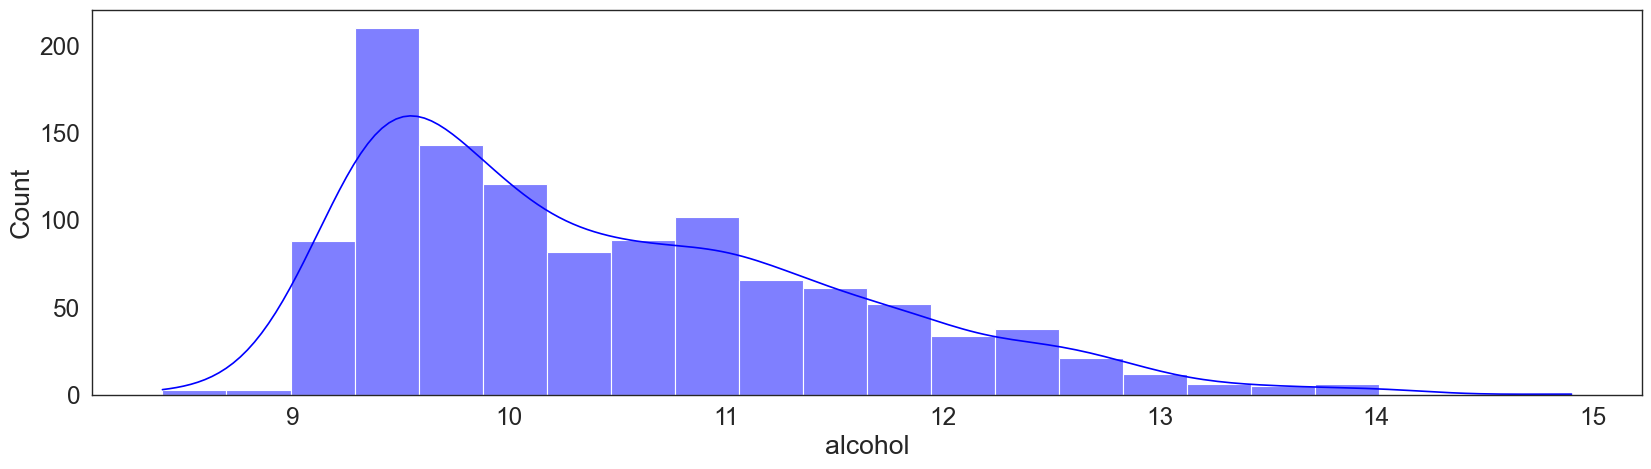

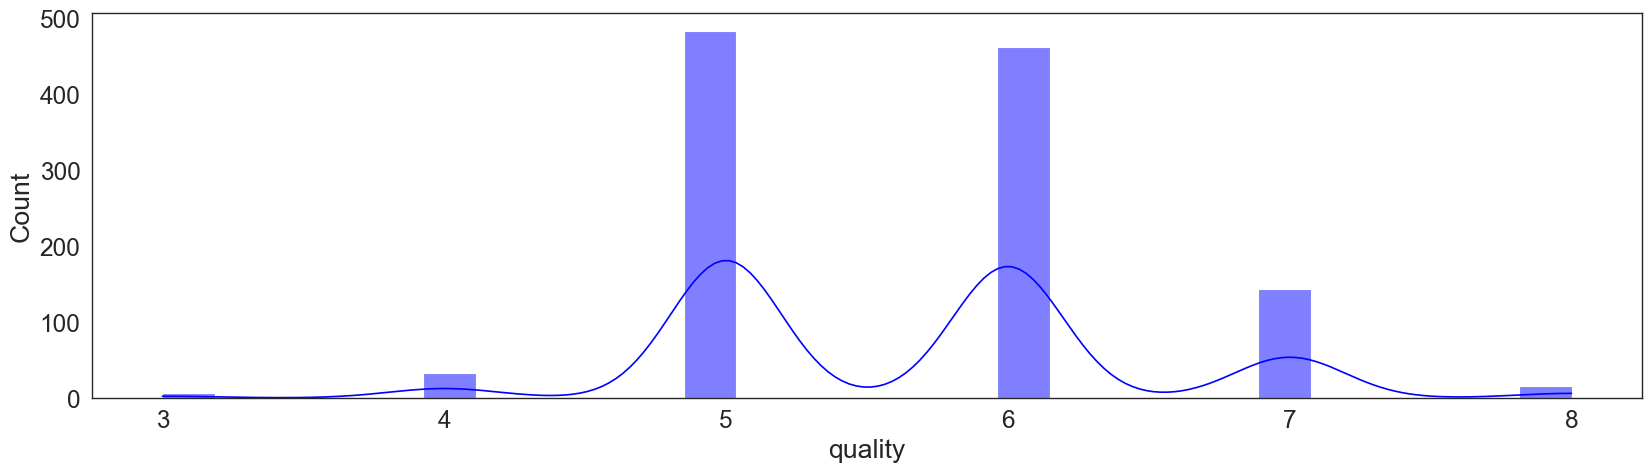

In [84]:
# Print out plots of each variable (column header) along with 
# KDE superimposed
for variable in wine_variables:
    sns.set_context("paper", font_scale=2)
    plt.figure(figsize=(20, 5))
    sns.histplot(df[variable],color='blue',kde=True)
    #plt.show()

## Probability distributions of variables

The method to determine the probability distributions will be as follows:
1. Plot a histogram of the variables data
2. Determine the likely probability distributions using the ***Fitter*** library
3. Determine the best method by using 'sum squared error' on the likely distributions
4. Use the generated parameters to generate synthetic data for the variable
5. Check that the generated synthetic data has the same probability distribution as the variable.
6. Append the checked, synthesised data to a dataframe 

The synthetic data generated will be approximately equal in number to the 'real' data - 1143 rows.
The reasoning behind this is that machine learning models typically seperate the data from anywhere in the range 50/25/25 to 75/15/10 - so double the amount of original data should be ample for any developments.

## Fixed acidity

Analyse the *fixed acidity* variable and determine it's probability distribution using the 'Fitter' library

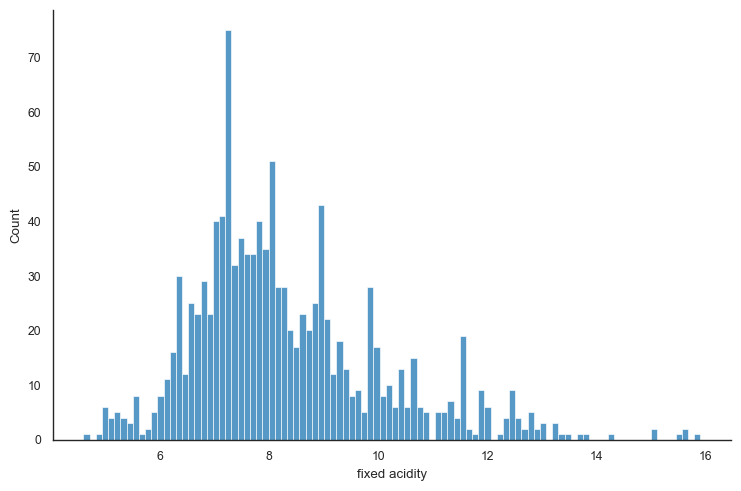

In [143]:
# Plot histograms of the data
sns.set_style('white')
sns.set_context("paper", font_scale=1)
sns.displot(data=df, x="fixed acidity", kind="hist", bins=100, aspect=1.5)

Determine the probability distribution using the 'Fitter' library.<br>
The values from the first column will be passed through the library (see below):

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 25.60it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.282317,678.293554,-9472.788689,inf,0.050560,5.592020e-03
chi2,0.299474,686.607150,-9405.354595,inf,0.057939,8.906417e-04
gamma,0.299475,686.607061,-9405.353280,inf,0.057939,8.905541e-04
cauchy,0.345093,681.612823,-9250.335602,inf,0.109318,2.373896e-12
rayleigh,0.386282,inf,-9121.456926,inf,0.152453,1.164303e-23


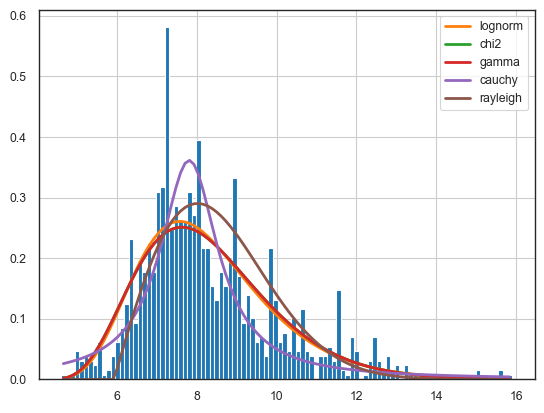

In [144]:
fixedAcidity = df["fixed acidity"].values
f = Fitter(fixedAcidity,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [145]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 0.3111165908311433,
  'loc': 2.894249875615288,
  'scale': 5.159301783923943}}

In [92]:
# Reminder about the variables from the first column:
# Get kurtosis, skew and variance
kurt = df["fixed acidity"].kurt()
print(f'Kurtosis is :\n{kurt}')

std_fa = df["fixed acidity"].std()
print(f'\nThe standard deviation is: \n{std_fa}')

var_fa = (std_fa)**2 
print(f'\nThe variance is: \n{var_fa}')

skew_fa = df["fixed acidity"]
print(f'\nThe skew is: \n{skew_fa.skew()}')

mean_fa = df["fixed acidity"].mean()
print(f'\nThe mean is: \n{mean_fa}')

Kurtosis is :
1.3846135487241824

The standard deviation is: 
1.747595017169539

The variance is: 
3.054088344035801

The skew is: 
1.0449299563724053

The mean is: 
8.311111111111119


### Synthesised data: fixed acidity

Now that the probability distribution is known, data can be synthesised with the identical probability distribution of the fixed acidity data and the same number of data points (1143).

mean: 8.3111
std:  1.7476


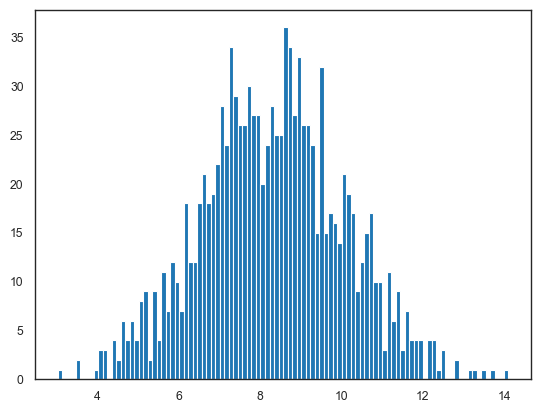

In [146]:
# fa_synth is the fixed acidity, synthesised data
fa_synth = lognorm.rvs(0.025, 0, 1, size=1143)

# standardisation to get mean = 0, std = 1
fa_synth = (fa_synth - np.mean(fa_synth)) / np.std(fa_synth)

# get desired mean + std
fa_synth = (fa_synth * std_fa) + mean_fa

plt.hist(fa_synth, bins=100)
print(f"mean: {np.mean(fa_synth):.4f}")
print(f"std:  {np.std(fa_synth):.4f}")

Check generated data matches the original probability distribution:

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 27.15it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.063838,637.653509,-11172.059326,inf,0.014323,0.970520
gamma,0.063857,637.857615,-11171.726161,inf,0.013594,0.982307
norm,0.064243,637.165505,-11171.877283,inf,0.015077,0.953863
exponpow,0.113626,671.482660,-10513.057340,inf,0.056609,0.001263
cauchy,0.180507,618.256421,-9991.051037,inf,0.076985,0.000002


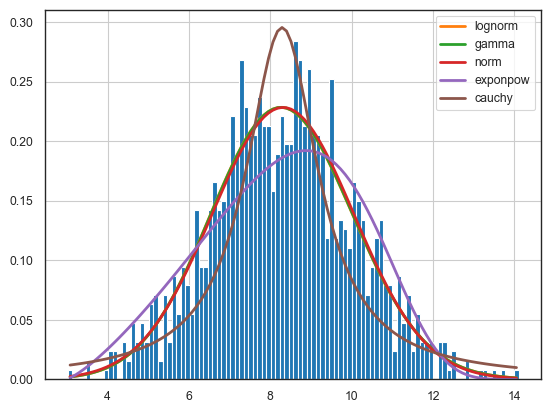

In [147]:
f = Fitter(fa_synth,
           distributions=get_common_distributions())
f.fit()
f.summary()

And so we can see that the synthesised data has the same probability distribution as the original and so we can expect similar behaviours when analysing the variable.<br>

### Append data

Now we need to create a new dataframe and insert the synthesised data into it.

In [114]:
df2 = pd.DataFrame(fa_synth)
print(df2)

              0
0      7.513601
1      9.869087
2      9.522239
3      7.390002
4      7.531836
...         ...
1138   5.984671
1139   8.381202
1140  10.495854
1141  12.539688
1142   7.746135

[1143 rows x 1 columns]


In [148]:
# Change the data type of the col header to string so that it can be edited.
df2.columns = df2.columns.astype("str")

df2.rename(columns = {"0":"Fixed Acidity"}, inplace = True)
print(df2)

      Fixed Acidity
0          7.513601
1          9.869087
2          9.522239
3          7.390002
4          7.531836
...             ...
1138       5.984671
1139       8.381202
1140      10.495854
1141      12.539688
1142       7.746135

[1143 rows x 1 columns]


Now the process is continued with each variable, determinining the probability distribution and generating data to match the distribution.

## Volatile acidity

Analyse the Volatile Acidity variable and determine it's probability distribution using the 'Fitter' library

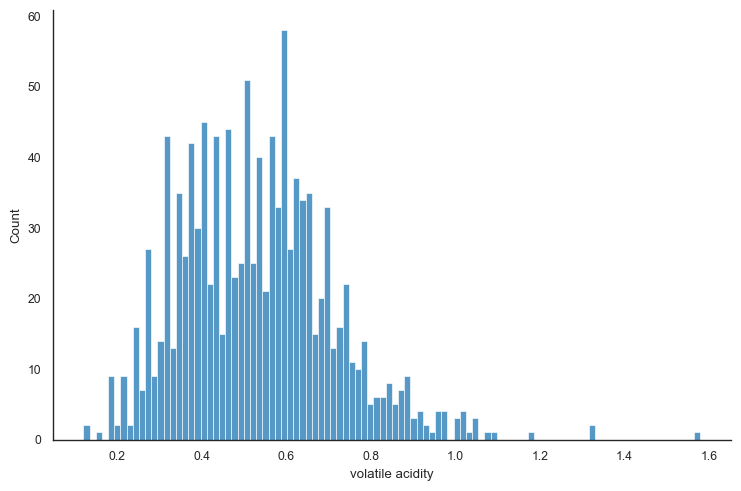

In [142]:
# Plot histograms of the data
sns.set_style('white')
sns.set_context("paper", font_scale=1)
sns.displot(data=df, x="volatile acidity", kind="hist", bins=100, aspect=1.5)

Use the Fitter library to determine the probability distribution:

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 45.36it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
chi2,16.189125,440.245925,-4844.709025,inf,0.043578,2.527282e-02
gamma,16.189127,440.246068,-4844.708847,inf,0.043577,2.527335e-02
lognorm,16.332038,424.769135,-4834.663216,inf,0.045014,1.887108e-02
norm,16.567258,710.219431,-4825.360095,inf,0.050588,5.555206e-03
exponpow,22.802897,899.257191,-4453.176758,inf,0.085841,8.912493e-08


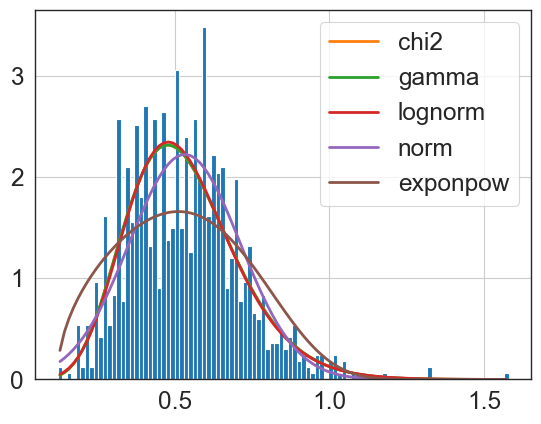

In [132]:
fixedAcidity = df["volatile acidity"].values
f = Fitter(fixedAcidity,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [133]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

{'chi2': {'df': 21.28150456047614,
  'loc': -0.05406603530302846,
  'scale': 0.02750766899560908}}

However, as the chi squared distribution is used to measure the fit between an observed distribution and a theoretical one, the gamma distribution will be used instead to synthesise the data.<br>
The reason behind this is if one was to look at the ***sumsquare_error*** column above, it can be seen that there is just 0.000002 of a difference between the chisquare and the gamma distribution.

### Citric acid

### Residual sugar

### Chlorides

### Free sulfur dioxide

### Total sulfur dioxide

### Density

### pH

### Sulphates

### Alcohol

### Quality

## Conclusion

## References

1. [Python Distfit package](https://pythonawesome.com/distfit-probability-density-fitting/)
2. [Definition of Generalised Extreme Value Distribution](https://en.wikipedia.org/wiki/Generalized_extreme_value_distribution)
3. [Definition of Beta Distribution](https://en.wikipedia.org/wiki/Beta_distribution)
4. [Definition of Exponential Distribution](https://en.wikipedia.org/wiki/Exponential_distribution)
5. [Python Fitter package](https://pypi.org/project/fitter/)
6. [Ways to use the describe() function](https://www.statology.org/pandas-describe/)
7. [Using Pandas to find Kurtosis](https://pythontic.com/pandas/dataframe-computations/kurtosis#:~:text=Kurtosis%20function%20in%20pandas%3A%201%20The%20pandas%20DataFrame,a%20normal%20distribution%20has%20a%20kurtosis%20of%200.)
8. [Performance comparison for column header lists](https://datatofish.com/list-column-names-pandas-dataframe/#:~:text=Here%20are%20two%20approaches%20to%20get%20a%20list,example%2C%20let%E2%80%99s%20create%20a%20DataFrame%20with%203%20columns%3A)
9. [Scipy lognormal distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html?highlight=lognormal)
10. [Changing Column headers in pandas](https://medium.com/swlh/pandas-different-ways-of-formatting-column-headers-aec6889d1881)
11. [Generating lognormal data](https://stackoverflow.com/questions/68361048/how-to-generate-lognormal-distribution-with-specific-mean-and-std-in-python)
12. [The Chi Squared distribution](#https://en.wikipedia.org/wiki/Chi-squared_distribution#:~:text=The%20chi-squared%20distribution%20is%20used%20in%20the%20common,a%20normal%20distribution%20from%20a%20sample%20standard%20deviation.)